In [34]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import os
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
test_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [4]:
# first test with the mean of sale price
test_df['SalePrice'] = pd.Series([train_df['SalePrice'].mean()]*len(train_df))
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,180921.19589
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,180921.19589
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,180921.19589
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,180921.19589
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,180921.19589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,180921.19589
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,180921.19589
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,180921.19589
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,180921.19589


In [5]:
# the output will be
test_df[['Id','SalePrice']].to_csv('average_prediction.csv',index=False)

# of course this is not a good output: the mean can't be a good prediction
# but it's something!!

In [5]:
# we use 2 columns for our model

from copy import deepcopy

train_df_sub = deepcopy(train_df[['MSSubClass', 'LotFrontage' ,'SalePrice']])

train_df_sub

,MSSubClass,LotFrontage,SalePrice
0,60,65.0,208500
1,20,80.0,181500
2,60,68.0,223500
3,70,60.0,140000
4,60,84.0,250000
...,...,...,...
1455,60,62.0,175000
1456,20,85.0,210000
1457,70,66.0,266500
1458,20,68.0,142125


In [7]:
train_df_sub = train_df_sub.fillna(train_df_sub.mean())

In [9]:
X_train = train_df_sub.to_numpy()[:,:-1]
Y_train = train_df_sub.to_numpy()[:,-1]

Y_train

array([208500., 181500., 223500., ..., 266500., 142125., 147500.])

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, Y_train)

lr.coef_

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


array([  75.96942776, 1260.11397803])

In [11]:
lr.intercept_

88327.8118861935

In [17]:
60*75.96942776 + 65*1260.11397803+88327.8118861935


174793.3861237435

In [13]:
train_df_sub['linear_prediction']= lr.predict(X_train)
train_df_sub

,MSSubClass,LotFrontage,SalePrice,linear_prediction
0,60,65.0,208500,174793.386124
1,20,80.0,181500,190656.318684
2,60,68.0,223500,178573.728058
3,70,60.0,140000,169252.510511
4,60,84.0,250000,198735.551706
...,...,...,...,...
1455,60,62.0,175000,171013.044190
1456,20,85.0,210000,196956.888574
1457,70,66.0,266500,176813.194379
1458,20,68.0,142125,175534.950948


In [14]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(train_df_sub['SalePrice'],train_df_sub['linear_prediction'])

54381.25047406032

In [15]:
test_df_sub= deepcopy(test_df[['MSSubClass', 'LotFrontage']])

test_df_sub

,MSSubClass,LotFrontage
0,20,80.0
1,20,81.0
2,60,74.0
3,60,78.0
4,120,43.0
...,...,...
1454,160,21.0
1455,160,21.0
1456,20,160.0
1457,85,62.0


In [16]:
test_df_sub = test_df_sub.fillna(test_df_sub.mean())

In [17]:
X_test = test_df_sub.to_numpy()
X_test

array([[ 20.,  80.],
       [ 20.,  81.],
       [ 60.,  74.],
       ...,
       [ 20., 160.],
       [ 85.,  62.],
       [ 60.,  74.]])

In [18]:
test_df['SalePrice']= lr.predict(X_test)
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,190656.318684
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,191916.432662
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,186134.411926
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,191174.867838
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,151629.044272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,126945.313866
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,126945.313866
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,291465.436927
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,172912.279884


In [19]:
test_df[['Id','SalePrice']].to_csv('linear_prediction.csv',index=False)

# TFDT (TensorFlow Decision Forest)



Import the library

In [32]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

In [33]:
 dataset_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

After importing the dataset and visualize the distribution of the numerical variables we create our model.

We can use all type of variables (numerical, categorical ecc.)

First we divide the dataset into training and testing dataset

In [34]:
import numpy as np

def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(dataset_df)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

1033 examples in training, 427 examples in testing.


As we can see, there are 1023 datas for training and 437 for testing.

Now we convert the two datasets into TensorFlow Datasets format (tf.data.Dataset).

Since our is a regression problem we need to explicit the task to 'tfdf.keras.Task.REGRESSION'


In [36]:
label = 'SalePrice'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)

Now we can select between 4 types of models:

* RandomForestModel
* GradientBoostedTreesModel
* CartModel
* DistributedGradientBoostedTreesModel

We'll choose the first as it's the most well-known.

We create the Random Forest

In [53]:
rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)
rf.compile(metrics=["mse"]) # Optional, you can use this to include a list of eval metrics

Use /tmp/tmp_2mhl3pm as temporary training directory


Now we need to train this model.

In [39]:
rf.fit(x = train_ds)

Reading training dataset...
Training dataset read in 0:00:01.127567. Found 1033 examples.
Training model...


[INFO 23-08-17 10:49:34.7288 UTC kernel.cc:1243] Loading model from path /tmp/tmpcan7hkh9/model/ with prefix da59ff50c15d4dcf


Model trained in 0:00:02.175964
Compiling model...


[INFO 23-08-17 10:49:35.1458 UTC decision_forest.cc:660] Model loaded with 300 root(s), 98122 node(s), and 75 input feature(s).
[INFO 23-08-17 10:49:35.1460 UTC abstract_model.cc:1311] Engine "RandomForestOptPred" built
[INFO 23-08-17 10:49:35.1461 UTC kernel.cc:1075] Use fast generic engine


Model compiled.


We can visualize one tree and choose which depth we wanna see.

In [40]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx = 0, max_depth = 3)

Now we evaluate the model using OOB (Out Of Bag) score.


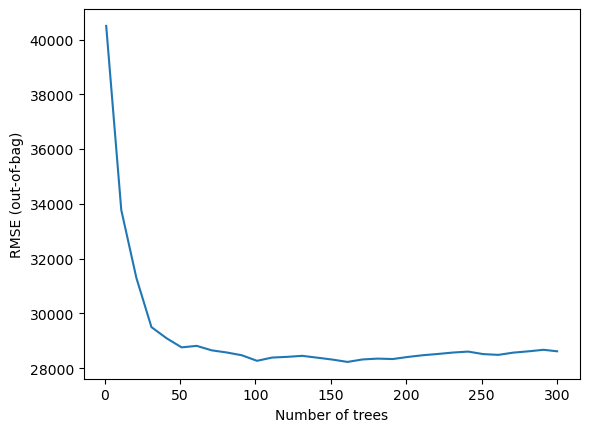

In [41]:
import matplotlib.pyplot as plt
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

In [42]:
inspector = rf.make_inspector()
inspector.evaluation()

evaluation = rf.evaluate(x=valid_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 362ms/step - loss: 0.0000e+00
loss: 0.0000


In [43]:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=1033, accuracy=None, loss=None, rmse=28617.10432548431, ndcg=None, aucs=None, auuc=None, qini=None)

In [44]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("OverallQual" (1; #63), 108.0),
 ("GarageCars" (1; #32), 48.0),
 ("ExterQual" (4; #22), 45.0),
 ("Neighborhood" (4; #60), 40.0),
 ("GrLivArea" (1; #38), 17.0),
 ("KitchenQual" (4; #45), 14.0),
 ("GarageArea" (1; #31), 10.0),
 ("YearBuilt" (1; #77), 7.0),
 ("BsmtQual" (4; #14), 3.0),
 ("TotalBsmtSF" (1; #74), 3.0),
 ("1stFlrSF" (1; #0), 2.0),
 ("GarageYrBlt" (1; #37), 2.0),
 ("YearRemodAdd" (1; #78), 1.0)]

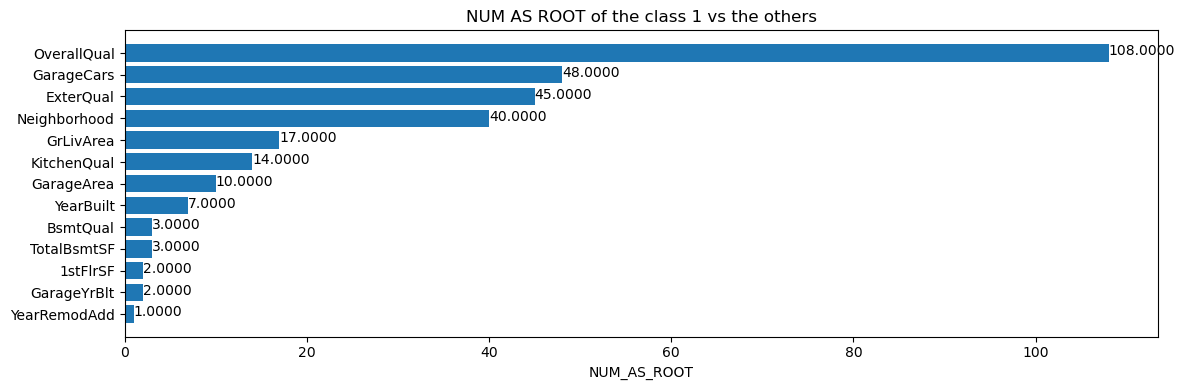

In [45]:
plt.figure(figsize=(12, 4))

# Mean decrease in AUC of the class 1 vs the others.
variable_importance_metric = "NUM_AS_ROOT"
variable_importances = inspector.variable_importances()[variable_importance_metric]

# Extract the feature name and importance values.
#
# `variable_importances` is a list of <feature, importance> tuples.
feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]
# The feature are ordered in decreasing importance value.
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# TODO: Replace with "plt.bar_label()" when available.
# Label each bar with values
for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()

.....

.....

In [47]:

test_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
ids = test_data.pop('Id')


In [48]:

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    test_data,
    task = tfdf.keras.Task.REGRESSION)


In [54]:
preds = rf.predict(test_ds)

2/2 [==============================] - 0s 25ms/step


In [55]:
output = pd.DataFrame({'Id': ids,
                       'SalePrice': preds.squeeze()})
output.head()


,Id,SalePrice
0,1461,0.0
1,1462,0.0
2,1463,0.0
3,1464,0.0
4,1465,0.0


In [56]:
sample_submission_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')
sample_submission_df['SalePrice'] = rf.predict(test_ds)
sample_submission_df.to_csv('/kaggle/working/submission.csv', index=False)


2/2 [==============================] - 0s 26ms/step
